In [23]:
import nibabel as nib
import os

# Correct file paths
mri_path = r'E:\1BA001\mr.nii.gz'
ct_path = r'E:\1BA001\ct.nii.gz'

# Check if files exist
if not os.path.exists(mri_path):
    print(f"File not found: {mri_path}")
if not os.path.exists(ct_path):
    print(f"File not found: {ct_path}")

# Load data if files are found
if os.path.exists(mri_path) and os.path.exists(ct_path):
    mri_img = nib.load(mri_path)
    ct_img = nib.load(ct_path)

    mri_data = mri_img.get_fdata()
    ct_data = ct_img.get_fdata()

    print(f"MRI intensity range: {mri_data.min()} to {mri_data.max()}")
    print(f"CT intensity range: {ct_data.min()} to {ct_data.max()}")
else:
    print("Please check the file paths and ensure the files exist.")


MRI intensity range: 0.0 to 3000.0
CT intensity range: -1023.0 to 1874.0


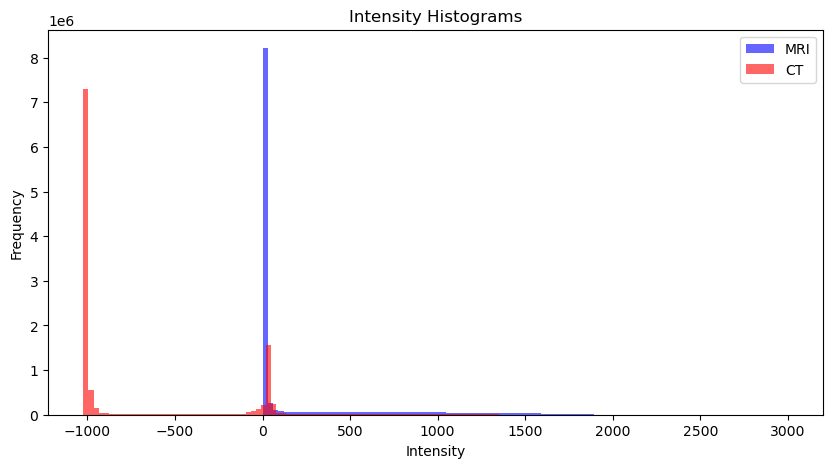

In [29]:
# Visualize intensity histograms
plt.figure(figsize=(10, 5))
plt.hist(mri_data.flatten(), bins=100, color='blue', alpha=0.6, label='MRI')
plt.hist(ct_data.flatten(), bins=100, color='red', alpha=0.6, label='CT')
plt.title("Intensity Histograms")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [27]:
import numpy as np
mri_normalized = (mri_data - mri_data.min()) / (mri_data.max() - mri_data.min())
ct_clipped = np.clip(ct_data, -1000, 1000)
ct_normalized = (ct_clipped - (-1000)) / (1000 - (-1000))


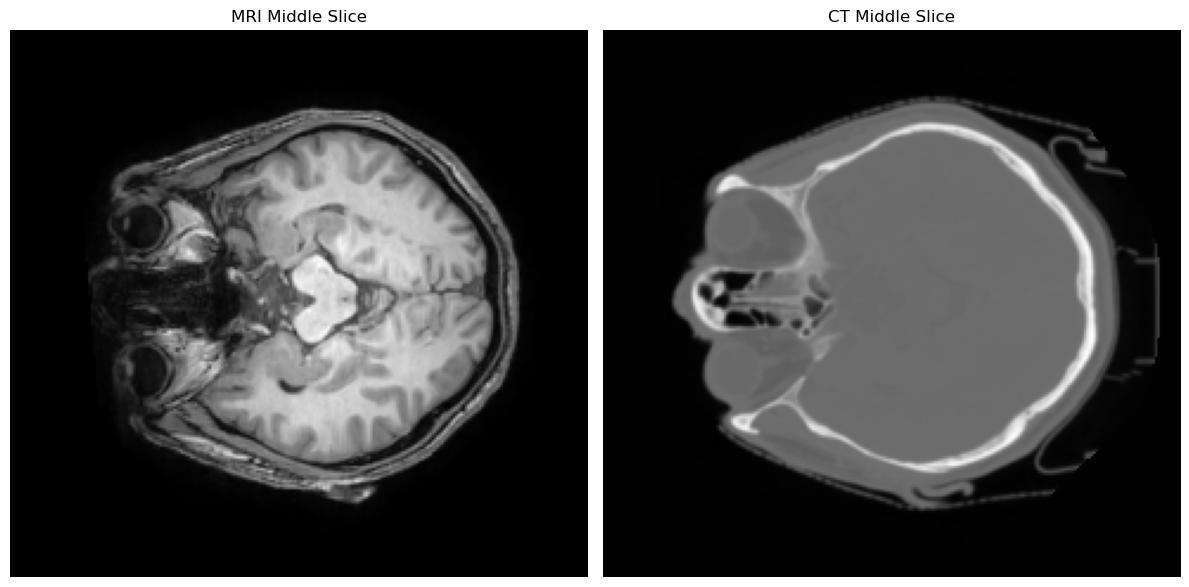

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Assuming mri_data and ct_data are 3D NumPy arrays
# mri_data: (height, width, depth)
# ct_data: (height, width, depth)

# Step 1: Extract the middle slice
mri_middle_slice = mri_data[:, :, mri_data.shape[2] // 2]  # Middle slice along the depth axis
ct_middle_slice = ct_data[:, :, ct_data.shape[2] // 2]    # Middle slice along the depth axis

# Step 2: Create a visualization
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the MRI slice
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.imshow(mri_middle_slice, cmap='gray')  # Display in grayscale
plt.title("MRI Middle Slice")
plt.axis('off')  # Remove axes for better visualization

# Plot the CT slice
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.imshow(ct_middle_slice, cmap='gray')  # Display in grayscale
plt.title("CT Middle Slice")
plt.axis('off')  # Remove axes for better visualization

# Show the plots
plt.tight_layout()
plt.show()


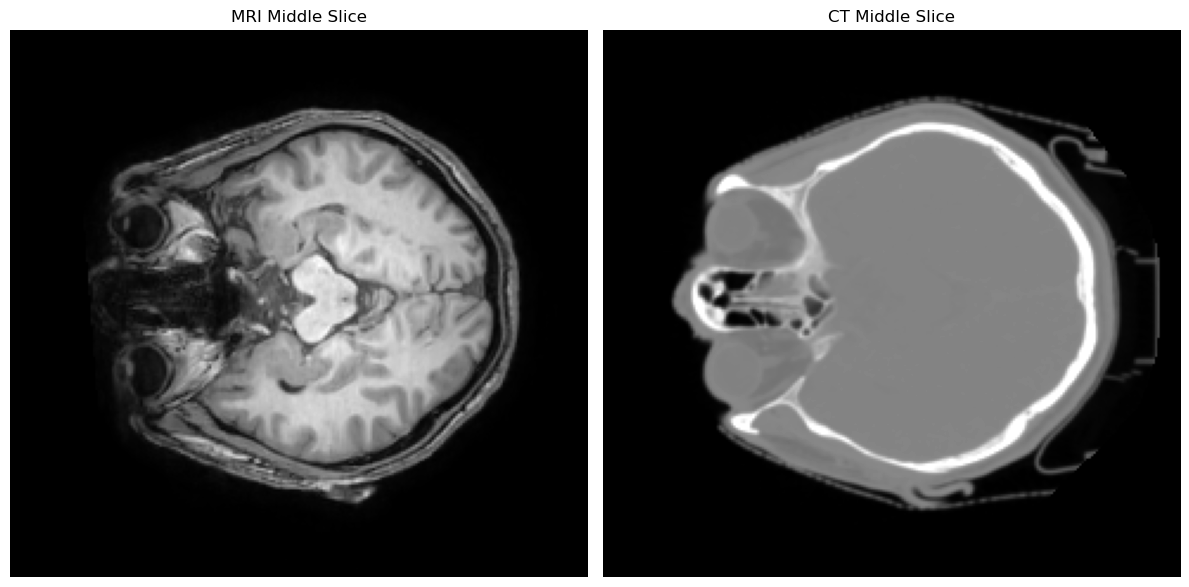

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Assuming mri_data and ct_data are 3D NumPy arrays
# mri_data: (height, width, depth)
# ct_data: (height, width, depth)

# Step 1: Extract the middle slice
mri_middle_slice = mri_normalized[:, :, mri_normalized.shape[2] // 2]  # Middle slice along the depth axis
ct_middle_slice = ct_normalized[:, :, ct_normalized.shape[2] // 2]    # Middle slice along the depth axis

# Step 2: Create a visualization
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the MRI slice
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.imshow(mri_middle_slice, cmap='gray')  # Display in grayscale
plt.title("MRI Middle Slice")
plt.axis('off')  # Remove axes for better visualization

# Plot the CT slice
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.imshow(ct_middle_slice, cmap='gray')  # Display in grayscale
plt.title("CT Middle Slice")
plt.axis('off')  # Remove axes for better visualization

# Show the plots
plt.tight_layout()
plt.show()


MRI Normalized and Masked:


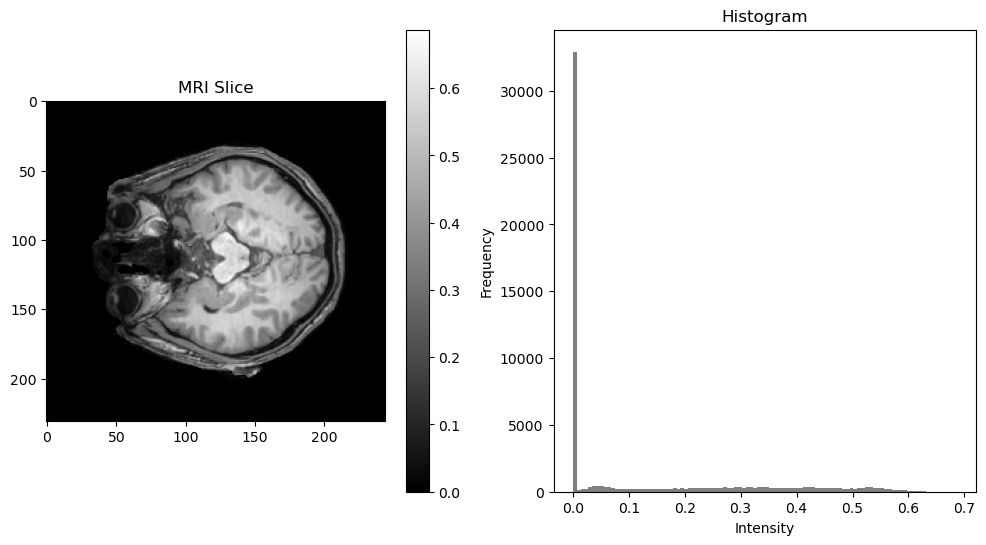

CT Normalized and Masked:


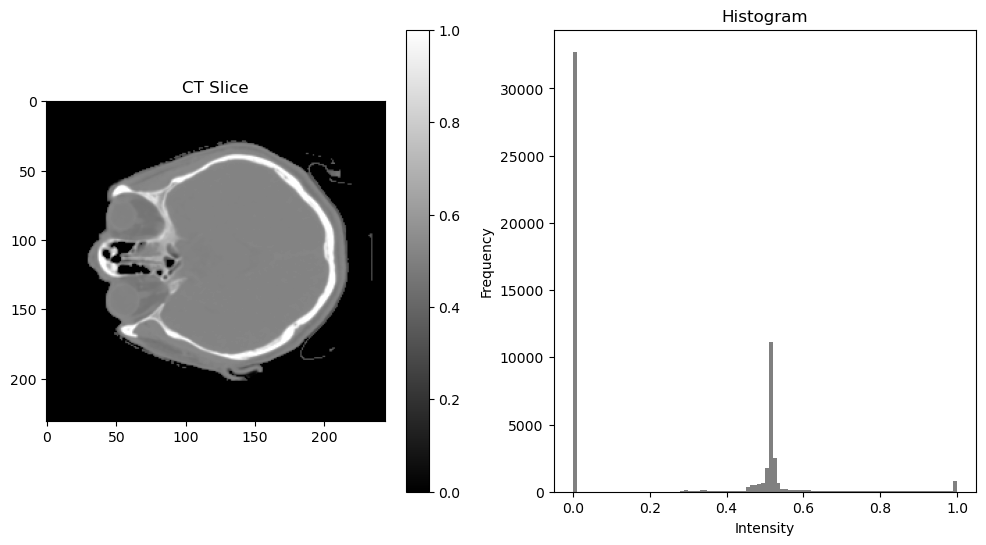

Raw CT Visualization (before normalization):


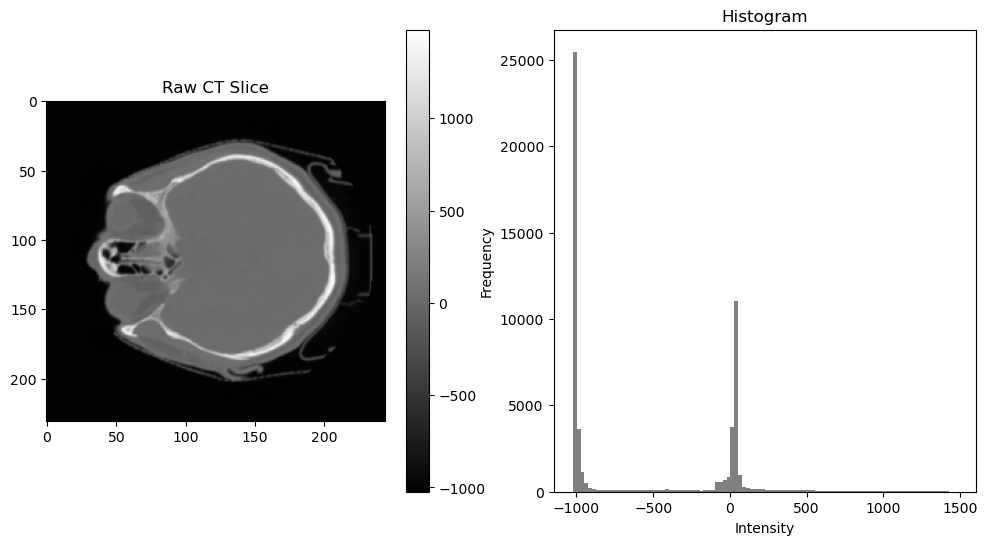

In [35]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Load NIfTI files
def load_nii_file(file_path):
    img = nib.load(file_path)
    return img.get_fdata()

# Normalize CT image (clip Hounsfield units and scale to [0, 1])
def normalize_ct(ct_image, clip_min=-1000, clip_max=1000):
    ct_image = np.clip(ct_image, clip_min, clip_max)  # Clip to Hounsfield range
    return (ct_image - clip_min) / (clip_max - clip_min)  # Scale to [0, 1]

# Normalize MRI image (scale to [0, 1])
def normalize_mri(mri_image):
    return (mri_image - np.min(mri_image)) / (np.max(mri_image) - np.min(mri_image))

# Apply mask
def apply_mask(image, mask):
    return np.where(mask > 0, image, 0)

# Visualize image and histogram
def visualize_image_and_histogram(image, title="Image"):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.hist(image.flatten(), bins=100, color="gray")
    plt.title("Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Process single patient
def process_single_patient(patient_dir):
    # Paths to files
    mr_path = os.path.join(patient_dir, "mr.nii.gz")
    ct_path = os.path.join(patient_dir, "ct.nii.gz")
    mask_path = os.path.join(patient_dir, "union_mask.nii.gz")

    # Load data
    mri_data = load_nii_file(mr_path)
    ct_data = load_nii_file(ct_path)
    mask_data = load_nii_file(mask_path)

    # Normalize data
    mri_normalized = normalize_mri(mri_data)
    ct_normalized = normalize_ct(ct_data)

    # Apply mask
    mri_masked = apply_mask(mri_normalized, mask_data)
    ct_masked = apply_mask(ct_normalized, mask_data)

    # Visualize results
    print("MRI Normalized and Masked:")
    visualize_image_and_histogram(mri_masked[:, :, mri_masked.shape[2] // 2], title="MRI Slice")
    print("CT Normalized and Masked:")
    visualize_image_and_histogram(ct_masked[:, :, ct_masked.shape[2] // 2], title="CT Slice")
    print("Raw CT Visualization (before normalization):")
    visualize_image_and_histogram(ct_data[:, :, ct_data.shape[2] // 2], title="Raw CT Slice")

# Execute for a single patient
patient_dir = "E:/1BA001"  # Replace with the patient's folder path
process_single_patient(patient_dir)


In [21]:
import os
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom
from sklearn.model_selection import train_test_split

# Step 1: Function to load NIfTI files
def load_nii_file(file_path):
    img = nib.load(file_path)
    return img.get_fdata()

# Step 2: Function to normalize CT image (clip Hounsfield units and scale to [0, 1])
def normalize_ct(ct_image, clip_min=-1000, clip_max=1000):
    ct_image = np.clip(ct_image, clip_min, clip_max)  # Clip to Hounsfield range
    return (ct_image - clip_min) / (clip_max - clip_min)  # Scale to [0, 1]

# Step 3: Function to normalize MRI image (scale to [0, 1])
def normalize_mri(mri_image):
    return (mri_image - np.min(mri_image)) / (np.max(mri_image) - np.min(mri_image))

# Step 4: Function to resize 2D images to target shape
def resize_image(image, target_shape):
    factors = (target_shape[0] / image.shape[0], target_shape[1] / image.shape[1])
    return zoom(image, factors, order=1)

# Step 5: Apply mask to MRI and CT slices
def apply_mask(mr_slice, ct_slice, mask_slice):
    masked_mr = np.where(mask_slice > 0, mr_slice, 0)  # Keep only the masked area
    masked_ct = np.where(mask_slice > 0, ct_slice, 0)  # Keep only the masked area
    return masked_mr, masked_ct

# Step 6: Process a single patient
def process_single_patient(patient_dir, target_shape=(256, 256)):
    mr_path = os.path.join(patient_dir, "mr.nii.gz")
    ct_path = os.path.join(patient_dir, "ct.nii.gz")
    mask_path = os.path.join(patient_dir, "union_mask.nii.gz")

    if not os.path.exists(mr_path) or not os.path.exists(ct_path) or not os.path.exists(mask_path):
        print(f"Missing data for patient at {patient_dir}.")
        return

    # Load images
    mr_img = load_nii_file(mr_path)
    ct_img = load_nii_file(ct_path)
    mask_img = load_nii_file(mask_path)

    num_slices = mr_img.shape[2]  # Number of slices

    input_data, output_data = [], []

    for slice_idx in range(num_slices):
        # Apply normalization
        mr_slice = normalize_mri(mr_img[:, :, slice_idx])
        ct_slice = normalize_ct(ct_img[:, :, slice_idx])
        mask_slice = normalize_mri(mask_img[:, :, slice_idx])  # Assuming mask image needs normalization as well

        # Apply mask
        masked_mr, masked_ct = apply_mask(mr_slice, ct_slice, mask_slice)

        # Resize
        masked_mr_resized = resize_image(masked_mr, target_shape)
        masked_ct_resized = resize_image(masked_ct, target_shape)

        input_data.append(masked_mr_resized)
        output_data.append(masked_ct_resized)

    # Save as .npy files
    patient_id = os.path.basename(patient_dir)
    save_as_npy(np.array(input_data), f"{patient_id}_input.npy")
    save_as_npy(np.array(output_data), f"{patient_id}_output.npy")

    print(f"Processed patient {patient_id}: {len(input_data)} slices.")

# Utility function to save numpy arrays
def save_as_npy(data, file_path):
    np.save(file_path, data)

# Step 7: Main execution
if __name__ == "__main__":
    base_dir = "E:/1BA001"  # Replace with your dataset directory
    patient_dir = "E:/1BA001"  # Replace with your single patient directory
    output_dir = os.path.join(base_dir, "single_patient_output")
    os.makedirs(output_dir, exist_ok=True)

    os.chdir(output_dir)  # Change working directory to the output directory
    process_single_patient(patient_dir)

    print("Processing completed for the single patient.")


Processed patient 1BA001: 204 slices.
Processing completed for the single patient.


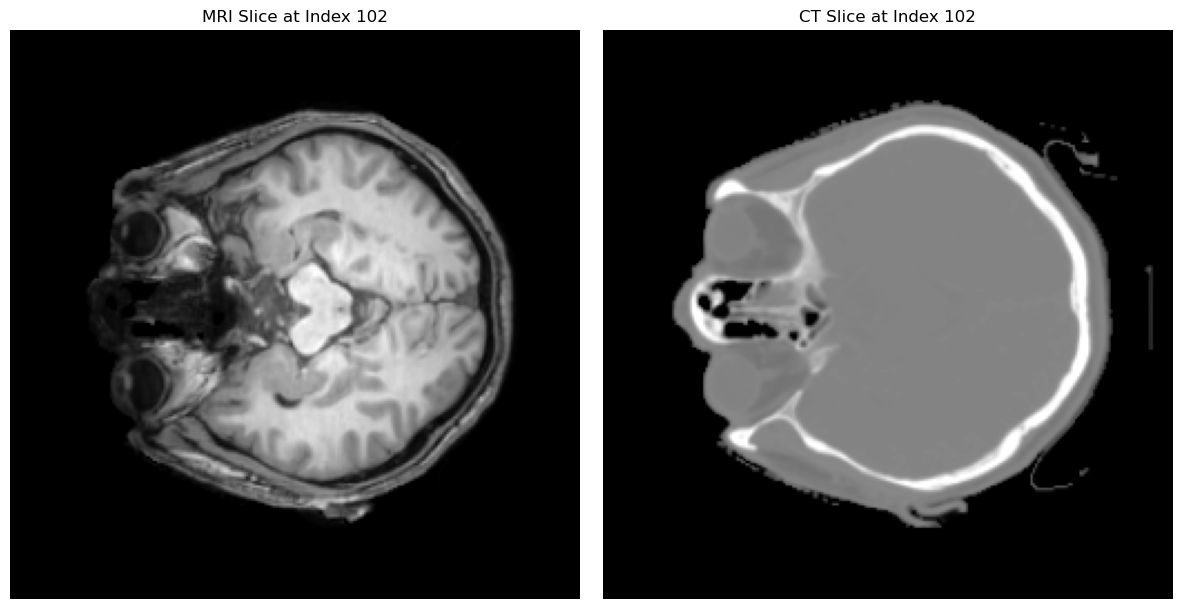

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Load MRI and CT images from .npy files
mri_image_path = 'E:/1BA001/single_patient_output/1BA001_input.npy'  # Replace with the actual path
ct_image_path = 'E:/1BA001/single_patient_output/1BA001_output.npy'    # Replace with the actual path

mri_image = np.load(mri_image_path)
ct_image = np.load(ct_image_path)

# Select a slice from the 3D image
slice_index = mri_image.shape[0] // 2  # Middle slice for 3D images
mri_slice = mri_image[slice_index, :, :]
ct_slice = ct_image[slice_index, :, :]

# Plot the MRI and CT images side by side
plt.figure(figsize=(12, 6))

# MRI slice
plt.subplot(1, 2, 1)
plt.imshow(mri_slice, cmap='gray')
plt.title('MRI Slice at Index {}'.format(slice_index))
plt.axis('off')

# CT slice
plt.subplot(1, 2, 2)
plt.imshow(ct_slice, cmap='gray')
plt.title('CT Slice at Index {}'.format(slice_index))
plt.axis('off')

plt.tight_layout()
plt.show()


In [1]:
#For many patients

In [ ]:
import os
import numpy as np
import nibabel as nib
from scipy.ndimage import zoom
from sklearn.model_selection import train_test_split

# Step 1: Function to load NIfTI files
def load_nii_file(file_path):
    img = nib.load(file_path)
    return img.get_fdata()

# Step 2: Function to normalize CT image (clip Hounsfield units and scale to [0, 1])
def normalize_ct(ct_image, clip_min=-1000, clip_max=1000):
    ct_image = np.clip(ct_image, clip_min, clip_max)  # Clip to Hounsfield range
    return (ct_image - clip_min) / (clip_max - clip_min)  # Scale to [0, 1]

# Step 3: Function to normalize MRI image (scale to [0, 1])
def normalize_mri(mri_image):
    return (mri_image - np.min(mri_image)) / (np.max(mri_image) - np.min(mri_image))

# Step 4: Function to resize 2D images to target shape
def resize_image(image, target_shape):
    factors = (target_shape[0] / image.shape[0], target_shape[1] / image.shape[1])
    return zoom(image, factors, order=1)

# Step 5: Apply mask to MRI and CT slices
def apply_mask(mr_slice, ct_slice, mask_slice):
    masked_mr = np.where(mask_slice > 0, mr_slice, 0)  # Keep only the masked area
    masked_ct = np.where(mask_slice > 0, ct_slice, 0)  # Keep only the masked area
    return masked_mr, masked_ct

# Step 6: Process dataset
def process_dataset(base_dir, output_dir):
    train_input, train_output = [], []
    val_input, val_output = [], []
    test_input, test_output = [], []

    target_shape = (256, 256)

    # Collect folders for processing
    anatomy_dir = os.path.join(base_dir, "./Task1/brain")
    patient_folders = [os.path.join(anatomy_dir, folder) for folder in os.listdir(anatomy_dir) if os.path.isdir(os.path.join(anatomy_dir, folder))]

    # Split folders into learning (train+val) and test sets
    num_test_folders = max(1, round(0.1 * len(patient_folders)))  # Approx. 10% for testing
    learning_folders, test_folders = train_test_split(patient_folders, test_size=num_test_folders, random_state=42)

    # Process test folders
    test_input_dir = os.path.join(output_dir, "Test_Patients_InputData")
    test_output_dir = os.path.join(output_dir, "Test_Patients_OutputData")
    os.makedirs(test_input_dir, exist_ok=True)
    os.makedirs(test_output_dir, exist_ok=True)

    for folder in test_folders:
        print("|", end="")
        mr_path = os.path.join(folder, "mr.nii.gz")
        ct_path = os.path.join(folder, "ct.nii.gz")
        mask_path = os.path.join(folder, "union_mask.nii.gz")

        if os.path.exists(mr_path) and os.path.exists(ct_path) and os.path.exists(mask_path):
            mr_img, ct_img, mask_img = load_nii_file(mr_path), load_nii_file(ct_path), load_nii_file(mask_path)
            num_slices = mr_img.shape[2]

            for slice_idx in range(num_slices):
                # Apply normalization
                mr_slice = normalize_mri(mr_img[:, :, slice_idx])
                ct_slice = normalize_ct(ct_img[:, :, slice_idx])
                mask_slice = normalize_mri(mask_img[:, :, slice_idx])  # Assuming mask image needs normalization as well

                # Apply mask
                masked_mr, masked_ct = apply_mask(mr_slice, ct_slice, mask_slice)

                # Resize
                masked_mr_resized = resize_image(masked_mr, target_shape)
                masked_ct_resized = resize_image(masked_ct, target_shape)

                test_input.append(masked_mr_resized)
                test_output.append(masked_ct_resized)

            # Save test data per folder
            patient_id = os.path.basename(folder)
            save_as_npy(np.array(test_input), os.path.join(test_input_dir, f"{patient_id}_input.npy"))
            save_as_npy(np.array(test_output), os.path.join(test_output_dir, f"{patient_id}_output.npy"))
            test_input, test_output = [], []  # Clear for next folder

    # Process learning folders (train + validation)
    input_data, output_data = [], []
    for folder in learning_folders:
        print(".", end="")
        mr_path = os.path.join(folder, "mr.nii.gz")
        ct_path = os.path.join(folder, "ct.nii.gz")
        mask_path = os.path.join(folder, "union_mask.nii.gz")

        if os.path.exists(mr_path) and os.path.exists(ct_path) and os.path.exists(mask_path):
            mr_img, ct_img, mask_img = load_nii_file(mr_path), load_nii_file(ct_path), load_nii_file(mask_path)
            num_slices = mr_img.shape[2]

            for slice_idx in range(num_slices):
                # Apply normalization
                mr_slice = normalize_mri(mr_img[:, :, slice_idx])
                ct_slice = normalize_ct(ct_img[:, :, slice_idx])
                mask_slice = normalize_mri(mask_img[:, :, slice_idx])  # Assuming mask image needs normalization as well

                # Apply mask
                masked_mr, masked_ct = apply_mask(mr_slice, ct_slice, mask_slice)

                # Resize
                masked_mr_resized = resize_image(masked_mr, target_shape)
                masked_ct_resized = resize_image(masked_ct, target_shape)

                input_data.append(masked_mr_resized)
                output_data.append(masked_ct_resized)

    # Split into train and validation sets
    train_input, val_input, train_output, val_output = train_test_split(
        input_data, output_data, test_size=0.1, random_state=42)

    # Save train and validation data
    save_as_npy(np.array(train_input), os.path.join(output_dir, "train_input.npy"))
    save_as_npy(np.array(train_output), os.path.join(output_dir, "train_output.npy"))
    save_as_npy(np.array(val_input), os.path.join(output_dir, "val_input.npy"))
    save_as_npy(np.array(val_output), os.path.join(output_dir, "val_output.npy"))

    print("\nProcessing completed.")
    print(f"Train set: {len(train_input)} pairs")
    print(f"Validation set: {len(val_input)} pairs")
    print(f"Test folders: {len(test_folders)} folders")

# Step 7: Execute processing
if _name_ == "_main_":
    base_dir = "./"  # Replace with your dataset directory
    output_dir = os.path.join(base_dir, "data(brain)")
    os.makedirs(output_dir, exist_ok=True)

    process_dataset(base_dir, output_dir)